# Credit Card Fraud Detection

The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.


# Main challenges involved in credit card fraud detection are:

1) Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.

2) Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones

3) Data availability as the data is mostly private.

4) Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.

5) Adaptive techniques used against the model by the scammers.

# How to tackle these challenges?
1) The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.

2) Imbalance can be dealt with by properly using some methods which we will talk about in the code

3) For protecting the privacy of the user the dimensionality of the data can be reduced.

4) Train the model.

# ML techniques that we are using in this notebook are 
1) RANDOM FOREST CLASSIFIER

2) SVM

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**LOADING THE DATASET IN THE NOTEBOOK**

In [2]:
df = pd.read_csv('/root/Desktop/creditcard.csv')

# EDA

In [3]:
df.head()    # gives by default the top five rows of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()   #gives bottom five rows of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape  #define the size of the data i.e (no. of rows * no. of columns)

(284807, 31)

In [6]:
df.isnull().sum()  # checking if there is any empty or missing values in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.dtypes    #checking the data-type of each column

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.describe().T  # To analyze the numeric column in the data

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
**NOW SEEING THAT OUR DATA IS FINE WE WILL NOW PLAY WITH OUR DATA LIKE REMOVING THE COLUMNS THAT ARE NOT REQUIRED OR CHECKING THE CORRELATION OF COLUMNS WITH ONE ANOTHER WE CAN DO MANY THINGS MORE. SO WITHOUT A FURTHER A DUE LETS GET GOING!!**

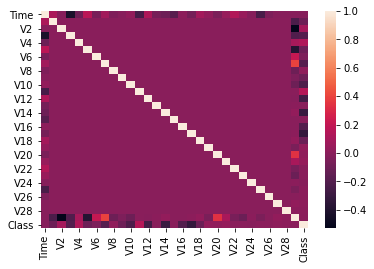

In [9]:
import seaborn as sns #seaborn is avisvualation library like matplotlib but with little more advanced visvualations
sns.heatmap(df.corr())
plt.show()

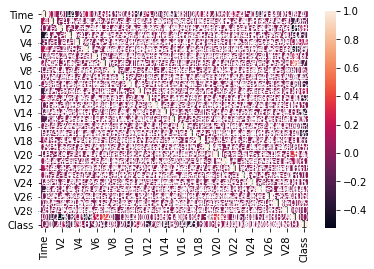

In [10]:
sns.heatmap(df.corr() , annot=True)  #annot stands for annotation displays the value of the relation of one column with another
plt.show()

**It is very messy since the no of columns are 31. It is to be applied were the numeric columns in the data are not more than 7 for better results**

In [11]:
df.drop('Time',axis=1,inplace=True)  # inplace=True means it will be permanently removed from our data

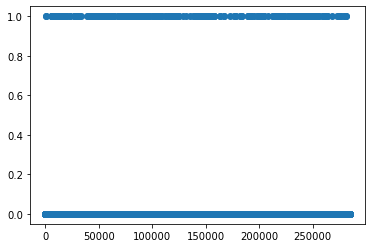

In [12]:
plt.scatter(df.index, df['Class'])  # checking the outliers the target data

In [13]:
df.Class.value_counts()    #checking the 0 and 1 values

0    284315
1       492
Name: Class, dtype: int64

**Now as we can see that the data is highly imbalanced which could lead to the error in training data or which we also call as the biased data. Therefore we will resample the data then we will train it.**

In [14]:
492/284315*100

0.17304750013189596

**Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced**

**SELECTING THE TARGET VARIABLES**

In [15]:
X = df.drop('Class',axis=1)
y = df['Class']

In [16]:
from imblearn.over_sampling import SMOTE  

**SMOTE is python library which is used when the data is imbalanced. The above is the code to import SMOTE for more details or documentation on the SMOTE you can click on the link Provides**

**https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html**

In [17]:
smote = SMOTE()

In [18]:
X_tf,y_tf = smote.fit_resample(X,y)  # resampling our target data tf=transform

In [19]:
import numpy as np
df_1 = np.hstack([X_tf,y_tf.values.reshape(-1,1)])

# Now Training and Testing Data

In [20]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_tf_train,X_tf_test,y_tf_train,y_tf_test = train_test_split(X_tf,y_tf,test_size=.5, random_state = 3300)

In [21]:
# RANDOM FOREST MODEL

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_tf_train,y_tf_train)

RandomForestClassifier()

In [26]:
pred = rfc.predict(X_tf_test)

**Checking the accuracy and precission of the model**

In [27]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score

In [28]:
print("The model used is Random Forest classifier") 

acc = accuracy_score(y_tf_test, pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_tf_test, pred) 
print("The precision is {}".format(prec)) 

The model used is Random Forest classifier
The accuracy is 0.9998663454267274
The precision is 0.9997401411665555


# SVM

In [29]:
params = {'n_estimators':[10,20,30]}

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
trainX,testX, trainY,testY = train_test_split(X_tf, y_tf)

In [33]:
gs = GridSearchCV(rfc, param_grid=params, cv=5, n_jobs=-1)

In [34]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30]})

In [35]:
gs.score(testX,testY)

0.9995084407741356

In [36]:
pred_1 = gs.predict(testX)

In [37]:
from sklearn.metrics import confusion_matrix